In [1]:
import os
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.spatial.distance import cdist
from utils.grouping import grouping
from utils.inference import yolo_prediction
from utils.functions import clean_noise
from utils.sinopsis import sinopsis

Extrayendo embeddings de las imagenes...


c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Procesando imágenes: 100%|██████████| 887/887 [02:03<00:00,  7.21it/s]
c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set 

Calculando la matriz de similitud...
Aplicando reducción de la dimensionalidad...
Aplicando MDS...
MDS completado.
Aplicando clustering...
Aplicando HDBSCAN...
HDBSCAN completado.


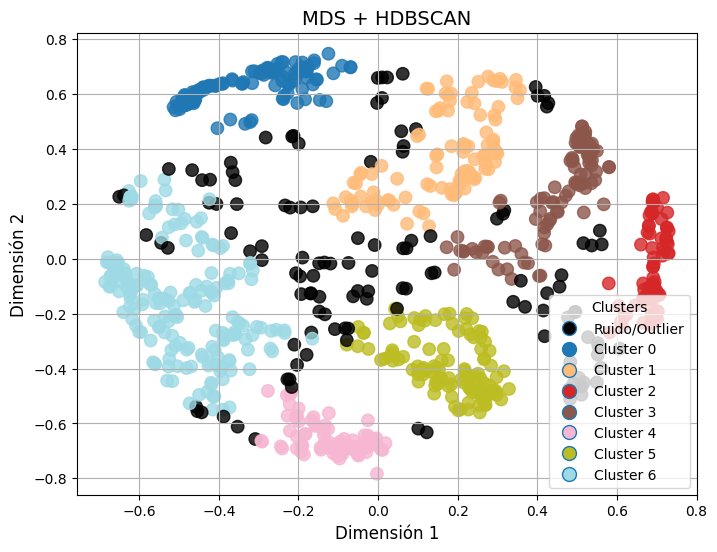


Cluster 0:
  Foto representativa: frame_000413.jpg
  Frames que pertenecen al clúster: ['frame_000342.jpg', 'frame_000343.jpg', 'frame_000344.jpg', 'frame_000345.jpg', 'frame_000346.jpg', 'frame_000357.jpg', 'frame_000358.jpg', 'frame_000359.jpg', 'frame_000360.jpg', 'frame_000361.jpg', 'frame_000362.jpg', 'frame_000363.jpg', 'frame_000364.jpg', 'frame_000365.jpg', 'frame_000366.jpg', 'frame_000367.jpg', 'frame_000368.jpg', 'frame_000369.jpg', 'frame_000370.jpg', 'frame_000371.jpg', 'frame_000372.jpg', 'frame_000373.jpg', 'frame_000374.jpg', 'frame_000375.jpg', 'frame_000376.jpg', 'frame_000377.jpg', 'frame_000378.jpg', 'frame_000379.jpg', 'frame_000380.jpg', 'frame_000381.jpg', 'frame_000382.jpg', 'frame_000383.jpg', 'frame_000384.jpg', 'frame_000385.jpg', 'frame_000386.jpg', 'frame_000387.jpg', 'frame_000388.jpg', 'frame_000389.jpg', 'frame_000390.jpg', 'frame_000391.jpg', 'frame_000392.jpg', 'frame_000393.jpg', 'frame_000394.jpg', 'frame_000395.jpg', 'frame_000396.jpg', 'frame_0003

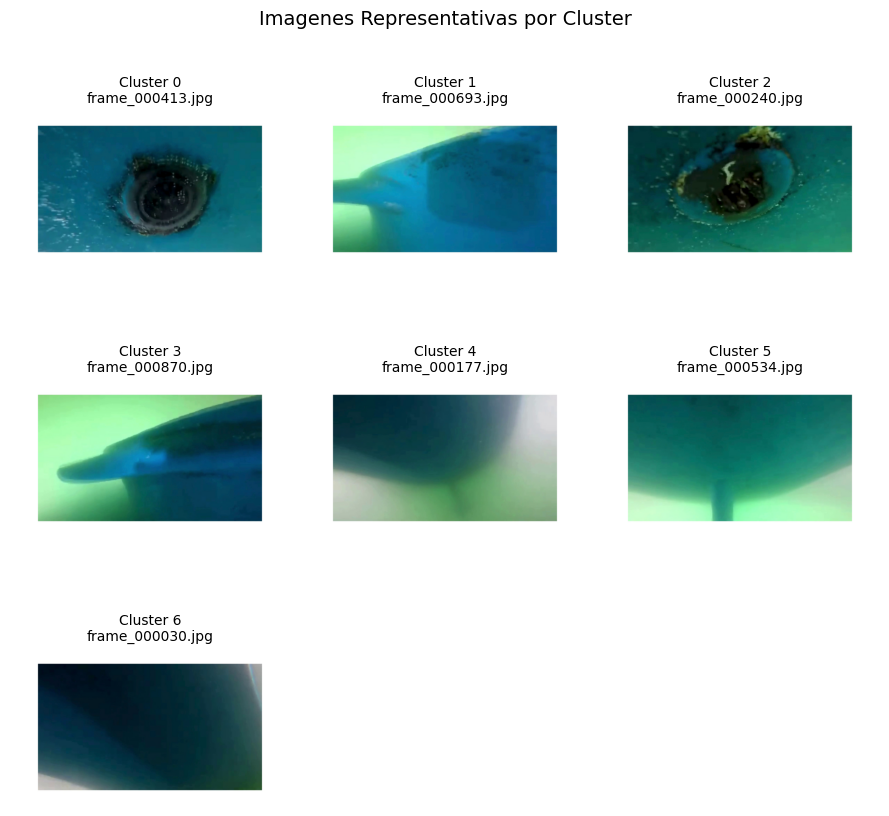

In [12]:
nombre_carpeta = 'Fotos_video_buque'
similitud = 'rbf' 
reducction = 'MDS'   
clustering = 'HDBSCAN'
df = grouping(nombre_carpeta,similitud,reducction,clustering,
              n_clusters=2,plot_similitud=False,plot_reduction=False,plot_clustering=True,plot_images=True)

In [13]:
# Opcional: quitar ruido
df = clean_noise(df)

In [14]:
# Inferencia de las imágenes con modelo YOLO

#Ruta del modelo YOLO preentrenado
model_path = "utils/best.pt"
#Ruta de la carpeta donde se encuentran las imágenes a inferir
input = "Fotos_video_buque"
#Ruta de la carpeta donde se guardarán las imágenes inferidas
output = "Fotos_video_buque_yolo"
#Objetos que se quieren detectar
filter = [1,3,4,8]
#filter=[0]
#Umbral de confianza para la detección de objetos
threshold = 0.2


df_inferenced = yolo_prediction(df,model_path,input,output,filter,conf_threshold=threshold)

Procesando frames: 100%|██████████| 761/761 [06:40<00:00,  1.90it/s]

✅ Procesado completado.
📁 Guardado en: Fotos_video_buque_yolo


Umbral automático = 0.283
Mantengo clusters: [2, 1, 0]
Descarto clusters: [4, 5, 3, 6]


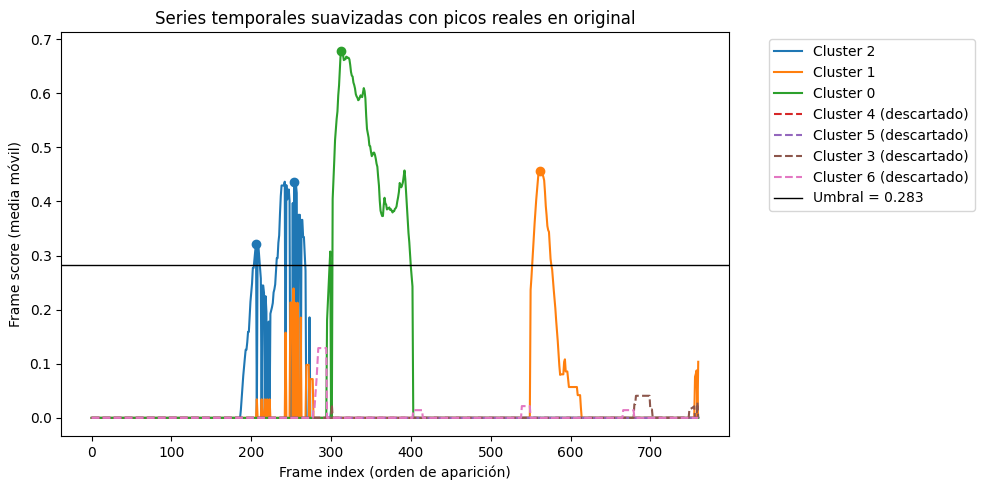

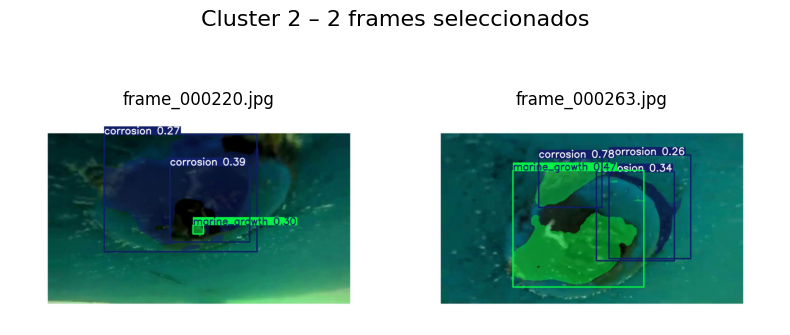

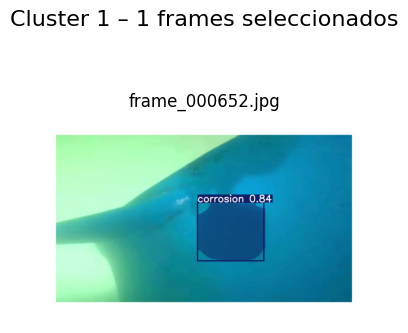

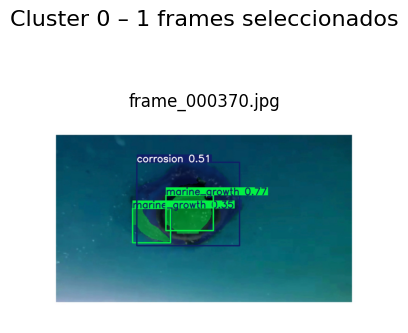

✅ Copiados 183 frames (±30) en 'Fotos_video_buque_sinopsis'


In [15]:
yolo_folder = "Fotos_video_buque_yolo"
output_folder = "Fotos_video_buque_sinopsis"

frames = sinopsis(df_inferenced, yolo_folder,output_folder, plot_series=True, plot_frames=True)

In [16]:
print(frames)

['frame_000220.jpg', 'frame_000263.jpg', 'frame_000652.jpg', 'frame_000370.jpg']
